#<font color = 'Navy'> Multilayer Perceptron

* Cancer real data
* Input Layer:  feature nodes
* Hidden Layer1
* Hidden layer2
* Output Layer: 2 nodes (binary output, using a sigmoid activation function for classification)
* plots loss function vs iterations for training and test data
* plots accuracy vs iterations for training and test data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

[Detailed about the real data and accuracy for different models](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

[Original paper](https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf;jsessionid=1308D2D7D7B7617756BFA116FE248A4E?sequence=1)



* predicting field 2, diagnosis: B = benign, M = malignant

* **from the original paper** in 1992 best predictive accuracy obtained using one separating plane (another machine learning model)  in the 3-D space of **Worst Area, Worst Smoothness and Mean Texture**.  Estimated accuracy 97.5% using repeated 10-fold crossvalidations.  Classifier has correctly diagnosed 176 consecutive new patients as of November 1995
* **from the detailed data** the accuracy with neural network models range from 0.8741 - 0.9650, we can get these values in our implementation, using all the features


#<font color = 'Navy'> Neural Network Learning Process


When using a neural network to predict medical outcomes, such as whether a tumor is malignant or benign, we rely on two primary steps: the **forward pass** and the **backward pass**. Here's how these steps work:

### Forward Pass
- **Make Predictions:** The neural network takes the input data (like medical imaging or test results) and applies its current understanding (weights and biases) to predict whether a tumor is malignant or benign.
- **Compare Predictions:** The predictions are then compared with the actual outcomes (the true diagnoses).
- **Calculate Error:** For each sample in the training data, the network calculates the difference between its prediction and the actual outcome. This difference is known as the error.
- **Compute Total Error (loss function):** All individual errors are summed up to get the total error, which represents how well the network is performing. A higher error means the predictions are mostly wrong, and a lower error means they are mostly right.

### Backward Pass
- **Adjust Parameters:** In response to the total error calculated in the forward pass, the backward pass adjusts the network's parameters (weights and biases). This process is called backpropagation.
- **Update Weights:** The adjustments are made in such a way that they would reduce the total error in future predictions. This step involves slightly tweaking the weights and biases based on how much they contributed to the error.
- **Prepare for Next Iteration:** After updating, the network is ready for the next round of learning (next epoch), where it will again try to predict, measure errors, and improve itself.

By repeatedly going through these steps, the neural network learns to make more accurate predictions over time.


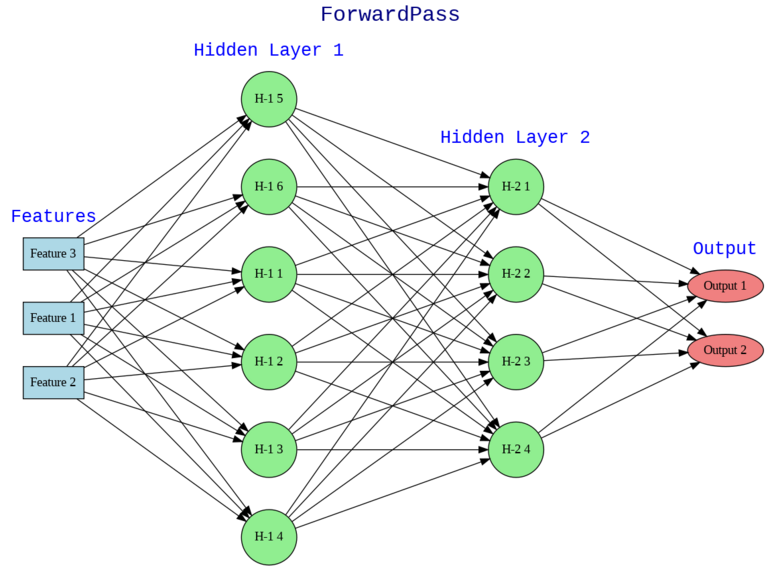

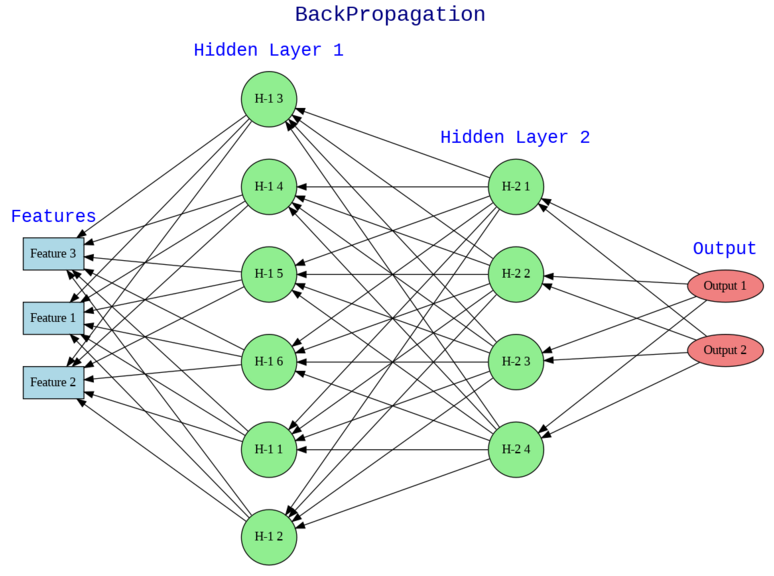

#<font color = 'Navy'> Neural Network Maths ☠

The neural network's learning process involves two main phases: the forward pass and the backward pass.

### Forward Pass
During the forward pass, the neural network calculates the output $\hat{y}$ for a given input $x$ based on its current weights $W$ and biases $b$. This is done using the formula:

$$ \hat{y} = \sigma(Wx + b) $$

Where:
- $\sigma$ represents the activation function, which introduces non-linearity to the model (sigmoid, ReLU, leaky Relu etc.). After some testing we have chosen Relu for the as the activation function between layers, and softmax for thr output, as we are predicting probabilities.
- $X$ is the input data: X_train
- $W$ and $b$ are the parameters of the model (weights and biases).
- $\hat{y}$ is the predicted output.

The network then computes the loss $L$, which measures the difference between the predicted output $\hat{y}$ and the actual output $y$. Usually the loss function in classification (probabilities) models is the cross-entropy loss:

$$ L = -\sum_{i} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $$

Where:
- $y_i$ is the actual label (real diagnosis) of the $i$-th sample
- $\hat{y}_i$ is the predicted probability (diagnosis) of the $i$-th sample

### Backward Pass
In the backward pass, the objective is to update the model parameters ($W$ and $b$) to minimize the loss. This is achieved through backpropagation, where the gradient of the loss function with respect to each parameter is calculated:

$$ \frac{\partial L}{\partial W}, \frac{\partial L}{\partial b} $$

Using the chain rule, these gradients tell us how a small change in $W$ or $b$ would affect the loss. The parameters are then updated using a learning method like gradient descent:

$$ W = W - \alpha \frac{\partial L}{\partial W} $$
$$ b = b - \alpha \frac{\partial L}{\partial b} $$

Where:
- $\alpha$ is the learning rate, a small positive scalar determining the step size at each iteration.

This process is repeated for several epochs, or iterations, over the training data to progressively reduce the error and improve the model's predictions.


## <font color = 'Red'>If we are into maths:

The backward pass, essential in training neural networks, involves computing the gradient of a loss function with respect to the network's parameters and updating these parameters accordingly. This process utilizes matrix operations

### **Notations**:
- **Weights and Biases:** $\mathbf{W}^{[l]}$ and $\mathbf{b}^{[l]}$ are the weights and biases of the $l$-th layer.
- **Activations:** $\mathbf{a}^{[l]}$ represents the activations after applying the activation function in layer $l$.
- **Linear Combination:** $\mathbf{z}^{[l]}$ is the linear combination of inputs and weights for layer $l$, i.e., $\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]}$.
- **Input Layer:** $\mathbf{a}^{[0]}$ denotes the input layer.


### ***Forward Pass***:
In matrix terms, the forward pass for each layer $l$ can be expressed as:

$\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]}$

$\mathbf{a}^{[l]} = \sigma(\mathbf{z}^{[l]})$
where $\sigma$ is the activation function (e.g., sigmoid, ReLU).

### ***Backward Pass***:
The backward pass computes the necessary gradients for updating the weights and biases:

#### *1 Gradient of the Loss Function:*
To minimize the loss $\mathcal{L}$, calculate:

$\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[l]}}$ and $\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[l]}}$

#### *2 Apply the Chain Rule:*
Starting from the output back to the input layer:

$\frac{\partial \mathcal{L}}{\partial \mathbf{z}^{[l]}} = \frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[l]}} \cdot \frac{\partial \mathbf{a}^{[l]}}{\partial \mathbf{z}^{[l]}}$

The derivative $\frac{\partial \mathbf{a}^{[l]}}{\partial \mathbf{z}^{[l]}}$ depends on the activation function used.

#### *3 Gradients with Respect to Weights and Biases:*
 $\frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[l]}} = \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{[l]}} \mathbf{a}^{[l-1]T}$ \

$\frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[l]}} = \sum \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{[l]}}$


#### *4 Gradients for Previous Layer Activations:*
$\frac{\partial \mathcal{L}}{\partial \mathbf{a}^{[l-1]}} = \mathbf{W}^{[l]T} \frac{\partial \mathcal{L}}{\partial \mathbf{z}^{[l]}}$

### *5 Parameter Update with Gradient Descent:*
Use gradient descent to update each parameter:

$\mathbf{W}^{[l]} := \mathbf{W}^{[l]} - \alpha \frac{\partial \mathcal{L}}{\partial \mathbf{W}^{[l]}}$

$\mathbf{b}^{[l]} := \mathbf{b}^{[l]} - \alpha \frac{\partial \mathcal{L}}{\partial \mathbf{b}^{[l]}}$
where $\alpha$ is the learning rate.

# <font color = 'Navy'>libraries

In [1]:
import pandas as pd
import sys

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
module_path = '/content/drive/MyDrive/multilayer_perceptron_neural_network'
if module_path not in sys.path:
    sys.path.append(module_path)

from v2_utils_perceptron import *

#<font color = 'Navy'>Data preprocessing

In [4]:
#importing the file from scractch
file_path = ('/content/drive/MyDrive/multilayer_perceptron_neural_network/data.csv')
df = pd.read_csv(file_path, header=None)

In [5]:
#df.shape

In [6]:
#add the real name of the features, doesn't normalize the data yet
#converts the ID number to Index
#Diagnosis: replace({'B': 0, 'M': 1}).astype(int)
df = df_prepare(df)

/content/drive/MyDrive/multilayer_perceptron_neural_network/v2_utils_perceptron.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})


In [7]:
#df.info()

##if we want to use all the features - do nothing


###if we want to use the selected features in data analysis

In [8]:
#import pickle
#feature_selection_path = '/content/drive/MyDrive/multilayer_perceptron_neural_network/features_selection.pkl'

#with open(feature_selection_path, 'rb') as file:
#    feature_selection = pickle.load(file)

In [9]:
#print(feature_selection)

In [10]:
#vars_to_keep = feature_selection
#vars_to_keep.insert(0, 'Diagnosis')
#df = df[vars_to_keep]

In [11]:
#df.info()

###if we want to select manually what features to keep

In [12]:
# List of features to keep, plus the target
#vars_to_keep = ['Diagnosis', 'Texture mean', 'Area worst', 'Smoothness worst' ]

In [13]:
# Keep only the columns specified in vars_to_keep list
#df = df[vars_to_keep]

In [14]:
df.head()

,Diagnosis,Radius mean,Radius se,Radius worst,Texture mean,Texture se,Texture worst,Perimeter mean,Perimeter se,Perimeter worst,...,Concavity worst,Concave points mean,Concave points se,Concave points worst,Symmetry mean,Symmetry se,Symmetry worst,Fractal dimension mean,Fractal dimension se,Fractal dimension worst
ID number,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##splitting train-test

In [15]:
df_train, df_test = train_test(df)

Enter a fraction between 0.25 and 0.95 of the samples to train the model (usually 0.80): 0.8

Creating df_train with 80% of the rows:

 df_train.shape: (455, 31)

Creating df_test with 20% of the rows:

df_test.shape: (114, 31)


In [16]:
#normalizes the features, and arranges the feautres and target
X_train, X_test, y_train, y_test = train_test_data(df_train, df_test)

#<font color = 'Navy'>Modeling the Neural Network

##setting the hyperparameters
* number of hidden layers
* nodes in each hidden layer
* epochs / iterations
* learning rate
* epochs info: how many epochs to show info

In [17]:
num_iterations_list = [3000, 1000]
learning_rate_list = [0.0011, 0.02]
n_hidden_layers_list = [
    [30, 20, 10],
    [20,25]
]

epoch_info = 10000
n_features = X_train.shape[0]

In [18]:
results_df = hyperparameter_tuning(X_train, y_train, X_test, y_test, num_iterations_list,
                                   learning_rate_list, epoch_info, n_features,
                                   n_hidden_layers_list, quiet_model)
results_df

Hyperparameter Tuning: 100%|██████████| 8/8 [00:25<00:00,  3.24s/combination]

   iterations  learning_rate hidden_layers  train_acc  test_accu  train_loss  \
3        3000         0.0200      [20, 25]   0.986813   0.973684    0.101902   
2        3000         0.0200  [30, 20, 10]   0.993407   0.964912    0.084173   
7        1000         0.0200      [20, 25]   0.962637   0.938596    0.254447   
6        1000         0.0200  [30, 20, 10]   0.923077   0.903509    0.669611   
1        3000         0.0011      [20, 25]   0.637363   0.587719    1.292544   
0        3000         0.0011  [30, 20, 10]   0.637363   0.587719    1.309218   
4        1000         0.0011  [30, 20, 10]   0.637363   0.587719    1.333433   
5        1000         0.0011      [20, 25]   0.637363   0.587719    1.330016   

   test_loss  
3   0.186260  
2   0.190452  
7   0.310399  
6   0.696991  
1   1.338567  
0   1.354509  
4   1.358029  
5   1.359219  


,iterations,learning_rate,hidden_layers,train_acc,test_accu,train_loss,test_loss
3,3000,0.0200,"[20, 25]",0.986813,0.973684,0.101902,0.186260
2,3000,0.0200,"[30, 20, 10]",0.993407,0.964912,0.084173,0.190452
7,1000,0.0200,"[20, 25]",0.962637,0.938596,0.254447,0.310399
6,1000,0.0200,"[30, 20, 10]",0.923077,0.903509,0.669611,0.696991
1,3000,0.0011,"[20, 25]",0.637363,0.587719,1.292544,1.338567
0,3000,0.0011,"[30, 20, 10]",0.637363,0.587719,1.309218,1.354509
4,1000,0.0011,"[30, 20, 10]",0.637363,0.587719,1.333433,1.358029
5,1000,0.0011,"[20, 25]",0.637363,0.587719,1.330016,1.359219


In [19]:
results_df.shape

(8, 7)

In [32]:
#Topology of the neural network
n_features, n_hidden_layers, n_neurons_per_layer, num_iterations, learning_rate, epoch_info = hyperparameters(X_train)

Enter the number of hidden layers (2-5): 3
Enter the number of neurons in layer 1: 30
Enter the number of neurons in layer 2: 20
Enter the number of neurons in layer 3: 10
Enter the number of iterations: 3000
Enter the learning rate in 0.001 - 0.99: 0.02
Enter how often to display epoch information: 200
Total number of parameters to estimate: 1782


In [33]:
parameters, training_loss, training_accuracy, test_loss, test_accuracy = model(X_train, y_train, X_test,
                                                                               y_test, num_iterations, learning_rate,
                                                                               epoch_info, n_features, n_hidden_layers, n_neurons_per_layer)

epoch 0 / 3000: train_loss = 1.386306, val_loss = 1.386820
epoch 0 / 3000: train_accuracy = 0.635165, val_accuracy = 0.578947

epoch 200 / 3000: train_loss = 1.306713, val_loss = 1.354938
epoch 200 / 3000: train_accuracy = 0.637363, val_accuracy = 0.587719

epoch 400 / 3000: train_loss = 1.295085, val_loss = 1.348873
epoch 400 / 3000: train_accuracy = 0.637363, val_accuracy = 0.587719

epoch 600 / 3000: train_loss = 1.269533, val_loss = 1.324097
epoch 600 / 3000: train_accuracy = 0.637363, val_accuracy = 0.587719

epoch 800 / 3000: train_loss = 1.165063, val_loss = 1.215312
epoch 800 / 3000: train_accuracy = 0.637363, val_accuracy = 0.587719

epoch 1000 / 3000: train_loss = 0.666406, val_loss = 0.693729
epoch 1000 / 3000: train_accuracy = 0.923077, val_accuracy = 0.903509

epoch 1200 / 3000: train_loss = 0.306954, val_loss = 0.346221
epoch 1200 / 3000: train_accuracy = 0.951648, val_accuracy = 0.938596

epoch 1400 / 3000: train_loss = 0.199595, val_loss = 0.257969
epoch 1400 / 3000: tr

##training the model

##ploting loss functions and accuracies

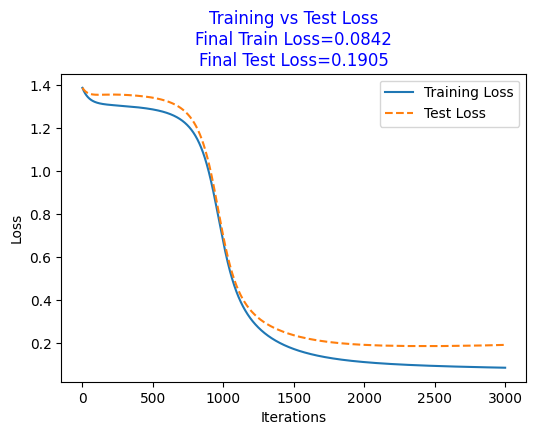

In [34]:
plot_loss(training_loss, test_loss)

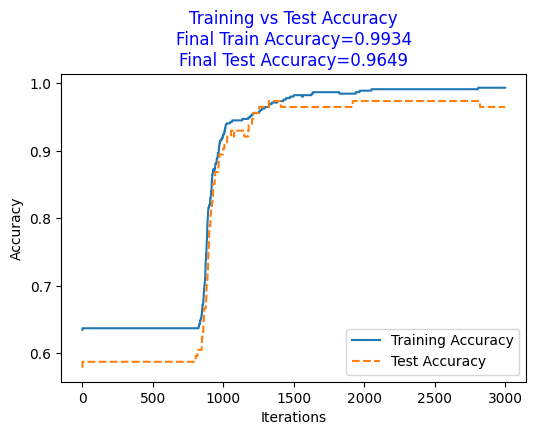

In [35]:
plot_accuracy(training_accuracy, test_accuracy)

#<font color = 'Navy'>Evaluating

##Importing the new data

In [36]:
#importing evaluation data
file_path = ('/content/drive/MyDrive/multilayer_perceptron_neural_network/data_training.csv')
df_data_train = pd.read_csv(file_path, header=None)

file_path = ('/content/drive/MyDrive/multilayer_perceptron_neural_network/data_test.csv')
df_data_test = pd.read_csv(file_path, header=None)

In [37]:
print(df_data_train.shape)
print(df_data_test.shape)

(427, 32)
(142, 32)


##Preparing the evaluating data

In [38]:
df_data_train = df_prepare(df_data_train)

/content/drive/MyDrive/multilayer_perceptron_neural_network/v2_utils_perceptron.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})


In [39]:
df_data_test = df_prepare(df_data_test)

/content/drive/MyDrive/multilayer_perceptron_neural_network/v2_utils_perceptron.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'B': 0, 'M': 1})


In [40]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_data(df_data_train, df_data_test)

##Training with evaluation data
* Using the same parameters as the original model
* The parameters can be changed above, in the original model

In [41]:
# Train the model and retrieve metrics
e_parameters, e_training_loss, e_training_accuracy, e_test_loss, e_test_accuracy = model(X_train_e, y_train_e, X_test_e,
                                                                               y_test_e, num_iterations, learning_rate, epoch_info, n_features, n_hidden_layers, n_neurons_per_layer)

epoch 0 / 3000: train_loss = 1.386451, val_loss = 1.386197
epoch 0 / 3000: train_accuracy = 0.615925, val_accuracy = 0.647887

epoch 200 / 3000: train_loss = 1.326663, val_loss = 1.295881
epoch 200 / 3000: train_accuracy = 0.618267, val_accuracy = 0.654930

epoch 400 / 3000: train_loss = 1.318049, val_loss = 1.283513
epoch 400 / 3000: train_accuracy = 0.618267, val_accuracy = 0.654930

epoch 600 / 3000: train_loss = 1.300711, val_loss = 1.265338
epoch 600 / 3000: train_accuracy = 0.618267, val_accuracy = 0.654930

epoch 800 / 3000: train_loss = 1.242573, val_loss = 1.206409
epoch 800 / 3000: train_accuracy = 0.618267, val_accuracy = 0.654930

epoch 1000 / 3000: train_loss = 0.962088, val_loss = 0.921916
epoch 1000 / 3000: train_accuracy = 0.852459, val_accuracy = 0.852113

epoch 1200 / 3000: train_loss = 0.439314, val_loss = 0.369743
epoch 1200 / 3000: train_accuracy = 0.934426, val_accuracy = 0.964789

epoch 1400 / 3000: train_loss = 0.280205, val_loss = 0.193373
epoch 1400 / 3000: tr

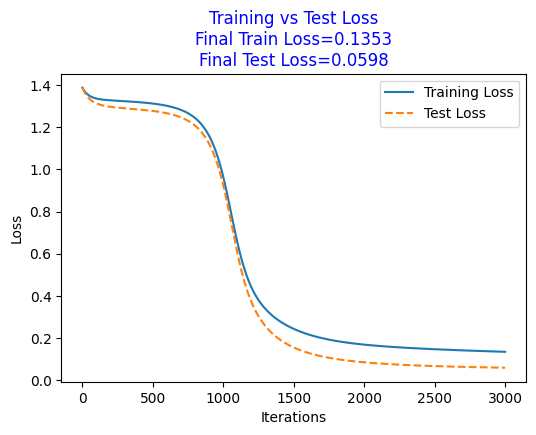

In [42]:
plot_loss(e_training_loss, e_test_loss)

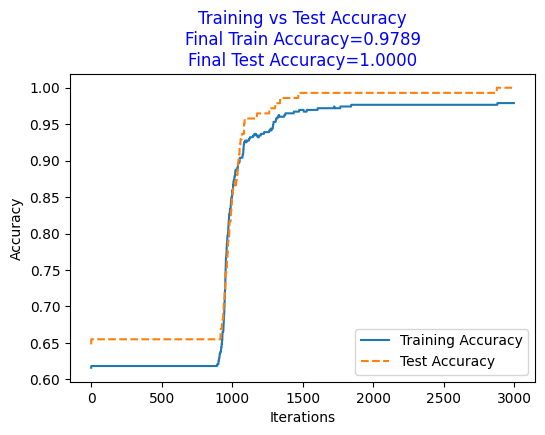

In [43]:
plot_accuracy(e_training_accuracy, e_test_accuracy)